In [13]:
import spatialdata as sd
from pathlib import Path

xenium_path = Path('/g/huber/projects/CODEX/segtraq/data/spatialdata_xenium_breast_cancer_rep1.zarr')
sdata = sd.read_zarr(xenium_path)

/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
sdata

SpatialData object, with associated Zarr store: /g/huber/projects/CODEX/segtraq/data/spatialdata_xenium_breast_cancer_rep1.zarr
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 25778, 35416), (1, 12889, 17708), (1, 6444, 8854), (1, 3222, 4427), (1, 1611, 2213)
│     └── 'morphology_mip': DataTree[cyx] (1, 25778, 35416), (1, 12889, 17708), (1, 6444, 8854), (1, 3222, 4427), (1, 1611, 2213)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 8) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (167780, 1) (2D shapes)
│     └── 'cell_circles': GeoDataFrame shape: (167780, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (167780, 313)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), morphology_mip (Images), transcripts (Points), cell_boundaries (Shapes), cell_circles (Shapes)

In [30]:
sdata['cell_boundaries'].centroid

cell_id
1           POINT (847.184 326.097)
2           POINT (826.156 327.999)
3            POINT (848.67 331.645)
4             POINT (824.14 334.12)
5           POINT (841.184 332.055)
                    ...            
167776     POINT (7455.439 5114.72)
167777    POINT (7483.733 5111.342)
167778    POINT (7470.137 5119.096)
167779    POINT (7477.687 5128.603)
167780    POINT (7489.338 5123.055)
Length: 167780, dtype: geometry

In [33]:
import scanpy as sc

adata = sdata['table']
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [34]:
adata

AnnData object with n_obs × n_vars = 167780 × 313
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [39]:
adata[adata.obs['total_counts']==0]

View of AnnData object with n_obs × n_vars = 1417 × 313
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [ ]:
sdata['transcripts'].compute()

,x,y,z,feature_name,cell_id,overlaps_nucleus,transcript_id,qv
0,4.395842,328.666473,12.019493,SEC11C,565,0,281474976710656,18.662479
1,5.074415,236.964844,7.608510,NegControlCodeword_0502,540,0,281474976710657,18.634956
2,4.702023,322.797150,12.289083,SEC11C,562,0,281474976710658,18.662479
3,4.906601,581.428650,11.222615,DAPK3,271,0,281474976710659,20.821745
4,5.660699,720.851746,9.265523,TCIM,291,0,281474976710660,18.017488
...,...,...,...,...,...,...,...,...
638078,5218.000488,5295.519531,30.560934,HOXD8,-1,0,281805689407068,20.061079
638079,5218.804688,4792.928223,38.440426,LUM,135717,1,281805689407071,21.389278
638080,5217.404785,5425.386230,30.519602,LUM,-1,0,281805689407078,21.960102
638081,5220.155273,4839.704102,32.180698,NARS,-1,0,281805689407083,25.970398


In [37]:
sdata['transcripts'].compute()['qv'].min()

np.float32(-0.0)

In [9]:
from pyarrow import parquet as pq
from pathlib import Path

transcripts_path = Path('/g/huber/projects/GSK_lazic/public_data/BIDCell/Xenium_BC/Replicate1/data/transcripts.parquet')
tx_df = pq.read_table(transcripts_path).to_pandas()

In [5]:
tx_df

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv
0,281474976710656,565,0,b'SEC11C',4.395842,328.666473,12.019493,18.662479
1,281474976710657,540,0,b'NegControlCodeword_0502',5.074415,236.964844,7.608510,18.634956
2,281474976710658,562,0,b'SEC11C',4.702023,322.797150,12.289083,18.662479
3,281474976710659,271,0,b'DAPK3',4.906601,581.428650,11.222615,20.821745
4,281474976710660,291,0,b'TCIM',5.660699,720.851746,9.265523,18.017488
...,...,...,...,...,...,...,...,...
42638078,281805689407068,-1,0,b'HOXD8',5218.000488,5295.519531,30.560934,20.061079
42638079,281805689407071,135717,1,b'LUM',5218.804688,4792.928223,38.440426,21.389278
42638080,281805689407078,-1,0,b'LUM',5217.404785,5425.386230,30.519602,21.960102
42638081,281805689407083,-1,0,b'NARS',5220.155273,4839.704102,32.180698,25.970398


In [27]:
tx_df['cell_id'].value_counts().sort_index()

cell_id
-1         2815605
 1              34
 2             104
 3              11
 4              11
            ...   
 167776        310
 167777        103
 167778        548
 167779        159
 167780        496
Name: count, Length: 166542, dtype: int64

In [10]:
tx_df['feature_name'] = tx_df['feature_name'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [11]:
prefixes = (
"NegControlProbe_",
"antisense_",
"NegControlCodeword_",
"BLANK_",
"Blank-",
"NegPrb",
"DeprecatedCodeword_",
"Intergenic_Region_",
"UnassignedCodeword_"
)

filtered_tx_df = tx_df[~tx_df["feature_name"].str.startswith(prefixes)]

/tmp/ipykernel_3915916/2200778175.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_ids)


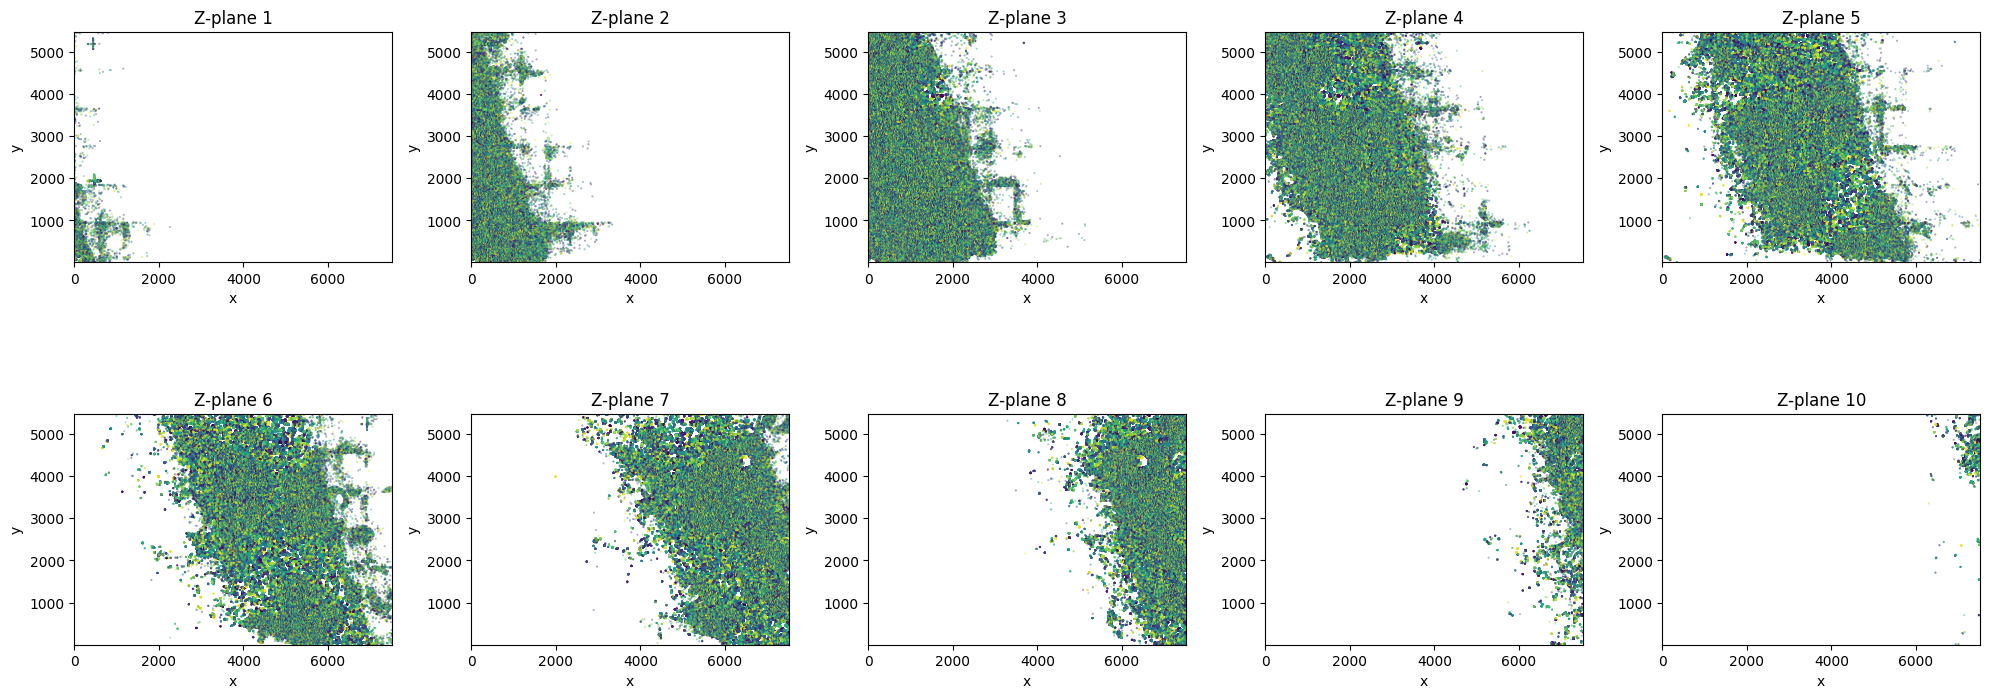

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

df = sdata['transcripts'].compute()
df = df[~df["feature_name"].str.startswith(prefixes)]

df['z_bin'] = pd.cut(df['z'], bins=10, labels=False)

x_min, x_max = df['x'].min(), df['x'].max()
y_min, y_max = df['y'].min(), df['y'].max()

num_planes = df['z_bin'].nunique()
fig, axes = plt.subplots(2, 5, figsize=(20, 8)) 
axes = axes.flatten()

# norm = mcolors.Normalize(vmin=df['cell_id'].min(), vmax=df['cell_id'].max())
# cmap = cm.viridis

df = df[df['cell_id'] != -1]

unique_ids = df['cell_id'].unique()
n_ids = len(unique_ids)

cmap = cm.get_cmap('viridis', n_ids)
colors = [cmap(i) for i in range(n_ids)]

np.random.shuffle(colors)

id_to_color = dict(zip(unique_ids, colors))

for i, ax in enumerate(axes[:num_planes]):
    plane_data = df[df['z_bin'] == i]
    colors = plane_data['cell_id'].map(id_to_color)
    ax.scatter(plane_data['x'], plane_data['y'], c=colors, s=0.2, alpha=0.5)
    ax.set_title(f"Z-plane {i+1}")
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

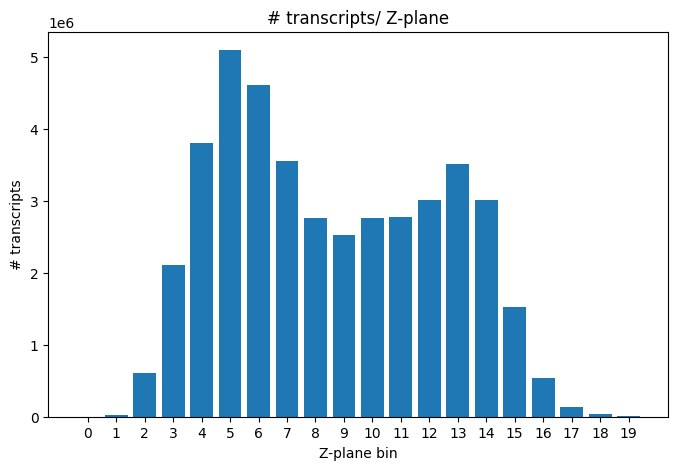

In [16]:
df['z_bin_20'] = pd.cut(df['z'], bins=20, labels=False)

counts = df['z_bin_20'].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, width=0.8)
plt.xlabel("Z-plane bin")
plt.ylabel("# transcripts")
plt.title("# transcripts/ Z-plane")
plt.xticks(counts.index) 
plt.show()

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = df[['x', 'y']].values
z=df['z'].values

model = LinearRegression().fit(X, z)
z_predicton = model.predict(X)

df['z_plane_reg'] = z - z_predicton

df['z_bin_flat'] = pd.cut(df['z_plane_reg'], bins=10, labels=False)

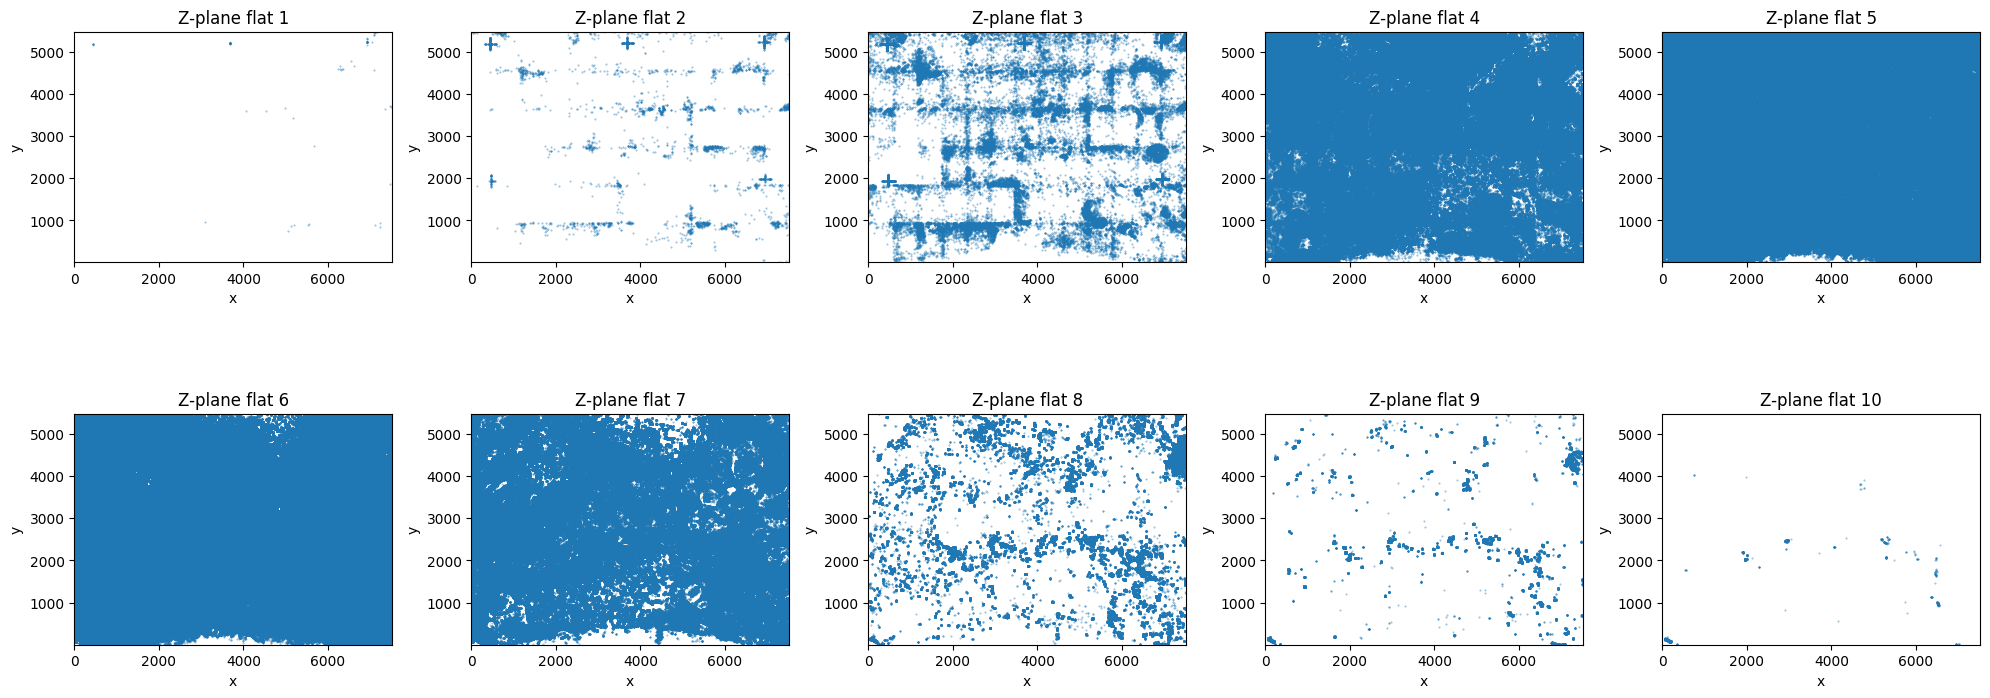

In [ ]:
x_min, x_max = df['x'].min(), df['x'].max()
y_min, y_max = df['y'].min(), df['y'].max()

num_planes = df['z_bin_flat'].nunique()
fig, axes = plt.subplots(2, 5, figsize=(20, 8)) 
axes = axes.flatten()

for i, ax in enumerate(axes[:num_planes]):
    plane_data = df[df['z_bin_flat'] == i]
    ax.scatter(plane_data['x'], plane_data['y'], s=0.2, alpha=0.5)
    ax.set_title(f"Z-plane flat {i+1}")
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


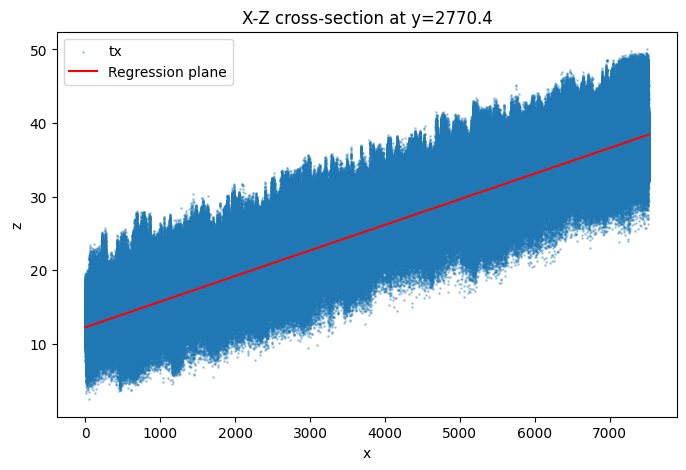

In [20]:
a, b = model.coef_

c = model.intercept_

y0 = np.median(df['y'])
x_vals = np.linspace(df['x'].min(), df['x'].max(), 200)
z_fit_x = a * x_vals + b * y0 + c

plt.figure(figsize=(8,5))
plt.scatter(df['x'], df['z'], s=1, alpha=0.3, label='tx')
plt.plot(x_vals, z_fit_x, color='red', label='Regression plane')
plt.xlabel('x')
plt.ylabel('z')
plt.title(f'X-Z cross-section at y={y0:.1f}')
plt.legend()
plt.show()


/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


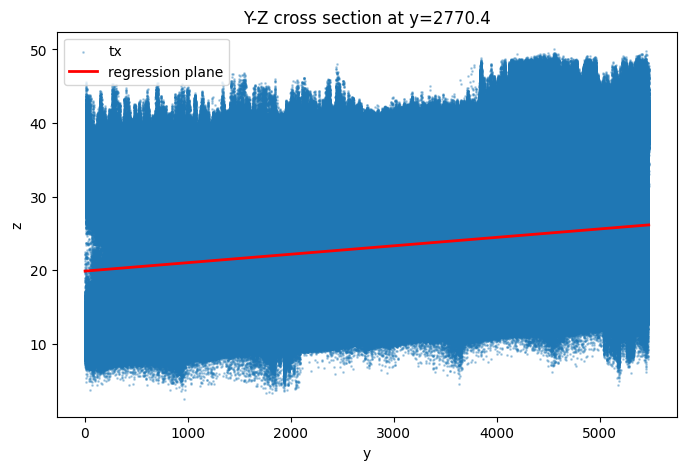

In [23]:
x0 = np.median(df['x'])
y_vals = np.linspace(df['y'].min(), df['y'].max(), 200)

z_fit_y = a * x0 + b * y_vals + c

plt.figure(figsize=(8,5))
plt.scatter(df['y'], df['z'], s=1, alpha=0.3, label='tx')
plt.plot(y_vals, z_fit_y, color ='red', lw=2, label='regression plane')
plt.xlabel('y')
plt.ylabel('z')
plt.title(f'Y-Z cross section at y={y0:.1f}')
plt.legend()
plt.show()

In [1]:
import pandas as pd

coords = "/home/lazic/src/EMBL/2025-01-13_proseg/data/coords.csv"

samples = pd.read_csv(coords)

In [2]:
samples

,Unnamed: 0,Coord,Sample,xmin,xmax,ymin,ymax,TMA,id
0,0,A1,2_3_H9815-03_1,-30.0,870.0,2276.5,3176.5,2,2_A1
1,1,A2,2_3_H8654-03_1,1011.8,1911.8,2209.3,3109.3,2,2_A2
2,2,A3,2_3_H8364-03_1,2056.4,2956.4,2167.2,3067.2,2,2_A3
3,3,A4,2_3_H1529-04_1,2986.8,3886.8,2051.6,2951.6,2,2_A4
4,4,A5,2_3_H518-04_1,4920.9,5820.9,1869.5,2769.5,2,2_A5
...,...,...,...,...,...,...,...,...,...
203,203,P5,5_3_H7552-00_3,5231.0,6131.0,17535.2,18435.2,5,5_P5
204,204,P6,5_3_H5782-00_3,6245.6,7145.6,17535.2,18435.2,5,5_P6
205,205,P8,5_3_H8966-00_3,8266.9,9166.9,17201.3,18101.3,5,5_P8
206,206,Q1,Tonsille,631.6,1531.6,19932.9,20832.9,5,5_Q1


In [3]:
from pathlib import Path

dest_folder = Path("/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots")

dest_folder.mkdir()

FileExistsError: [Errno 17] File exists: '/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots'

In [5]:
import shutil
from pathlib import Path

samples_path = Path("/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER")

for idx, row in samples.iterrows():
    query_file = Path(f"{samples_path}/tma_{row.TMA}/{row.id}/dapi_um.tif")
    if query_file.exists():
        shutil.copy(query_file, f"{samples_path}/proseg_all_masks/{row.id}_DAPI.tiff")
    else:
        print(f"File {query_file} does not exist, skipping.")


Available platform plugins are: linuxfb, minimal, offscreen, vnc, webgl, xcb.



: 

In [ ]:
# import shutil 

# samples_path = Path("/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER")

# for idx, row in samples.iterrows():
#     query_file = Path(f"{samples_path}/tma_{row.TMA}/{row.id}/R_plots/tumor_CD8A.png")
#     if query_file.exists():
#         if Path(f"{dest_folder}/{row.TMA}_{row.id}_Rplots").exists():
#             shutil.rmtree(f"{dest_folder}/{row.TMA}_{row.id}_Rplots")
#         shutil.copytree(query_file.parent, f"{dest_folder}/{row.TMA}_{row.id}_Rplots")
#         shutil.copy(query_file.parent.parent / "proseg_output/segmentation_masks/segmentation_mask_mip.tiff", f"{dest_folder}/{row.TMA}_{row.id}_Rplots/proseg_mask.tiff")
#         shutil.copy(query_file.parent.parent / "proseg_output/colored_mask_proseg_c_1.tiff", f"{dest_folder}/{row.TMA}_{row.id}_Rplots/proseg_mask_colored.tiff")
#         shutil.copy(query_file.parent.parent / "dapi_um.tif", f"{dest_folder}/{row.TMA}_{row.id}_Rplots/dapi.tiff")
#         print(f"{dest_folder}/{row.TMA}_{row.id}_Rplots")
#     if not query_file.exists() and query_file.parent.exists():
#         print(f"For sample {row.id}, the R plots folder was generated but not populated.")

/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_A2_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_B4_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_B6_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_B7_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_B8_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_C1_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_C3_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_C4_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_C5_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_C7_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_D1_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_D6_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/2_2_D8_Rplots
/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_

In [9]:
import shutil 
import os 

samples_path = Path("/g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER")

for idx, row in samples.iterrows():
    query_file = Path(f"{samples_path}/tma_{row.TMA}/{row.id}/R_plots/tumor_CD8A.png")
    if query_file.exists():
        plot_names = os.listdir(query_file.parent) 
        for p in plot_names:
            if not p in ['CellSPA_snakemake.html', 'CellSPA_snakemake_files', '.snakemake_timestamp']:
                plot_folder = Path(f"{dest_folder}/{p.split('.')[0]}")
                if not plot_folder.exists():
                    plot_folder.mkdir()
                shutil.copy(query_file.parent / p, Path(f"{plot_folder}/{row.id}.png"))
                print(f"Saved into folder: {plot_folder}")
        if not Path(f"{dest_folder}/masks").exists():
            Path(f"{dest_folder}/masks").mkdir()
        shutil.copy(query_file.parent.parent / "proseg_output/segmentation_masks/segmentation_mask_mip.tiff", f"{dest_folder}/masks/{row.id}_proseg_mask.tiff")
        shutil.copy(query_file.parent.parent / "proseg_output/colored_mask_proseg_c_1.tiff", f"{dest_folder}/masks/{row.id}_proseg_mask_colored.tiff")
        shutil.copy(query_file.parent.parent / "dapi_um.tif", f"{dest_folder}/masks/{row.id}_dapi.tiff")
    if not query_file.exists() and query_file.parent.exists():
        print(f"For sample {row.id}, the R plots folder was generated but not populated.")


Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/histograms_shapes
Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/celltype_proportions_barplot
Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/boxplots_total_transcripts
Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/boxplots_genes_expressed
Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/histograms_elongation
Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/UMAP_celltypes_legend
Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/UMAP_markers
Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/heatmap_correlation_proseg
Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/corr_vs_totaltranscripts
Saved into folder: /g/huber/projects/GSK_lazic/B_NHL/BNHL_RICOVER/all_R_plots/corr_vs_tota

In [1]:
import anndata as ad
from pathlib import Path

scRNAseq_data_path = Path("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/scRNAseq/HLCA_subset_IPF_COPD_ILD.h5ad")
#adata = ad.read(scRNAseq_data_path, backed='r')
adata = ad.read(scRNAseq_data_path)

/home/lazic/miniforge3/envs/spatialdata_xenium2/lib/python3.10/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [2]:
import anndata as ad
from pathlib import Path

seg_adata_path = Path('/home/lazic/.sopa_cache/fe47e8ef-5c16-423a-afe3-852245bc0c12/transcript_patches/0/segmentation_counts.h5ad')

seg_adata = ad.read(seg_adata_path)

/home/lazic/miniforge3/envs/spatialdata_xenium2/lib/python3.10/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [13]:
seg_adata.uns

{'df_spots': {'transcripts':        node_index           x           y   z_  genes  cell_id  \
  0               0  111.111505  610.189298  1.0  EPCAM        1   
  1               1  109.002042  607.359920  1.0  EPCAM        1   
  2               2  110.386745  607.485343  1.0  CXCL1        1   
  3               3  107.789506  611.847764  1.0  EPCAM        0   
  4               4  108.777584  611.540180  1.0  EPCAM        1   
  ...           ...         ...         ...  ...    ...      ...   
  15028       15028  204.995805  725.879300  1.0  CXCL4      251   
  15029       15029  205.881250  725.775228  1.0   CD3E      251   
  15030       15030  202.981520  726.346170  1.0   CD20        0   
  15031       15031  204.374944  726.492638  1.0   CD20      251   
  15032       15032  205.050315  726.173747  1.0   CD3E      251   
  
         cellpose_boundaries  z  nb_mol  index_commu leiden_merged  \
  0                        9  0       1           17             7   
  1           

In [23]:
del adata

In [3]:
adata_subset = adata[adata.obs["disease"].isin(["chronic obstructive pulmonary disease", "normal"]) & (adata.obs["study"] == "Kaminski_2020")]

In [2]:
import scanpy as sc
import pandas as pd

In [4]:
df = pd.DataFrame({
    "cell_type": adata_subset.obs["original_ann_nonharmonized"].cat.categories,
    "shape": "non-elongated"
})

In [5]:
df.head()

,cell_type,shape
0,ATI,non-elongated
1,ATII,non-elongated
2,Aberrant_Basaloid,non-elongated
3,B,non-elongated
4,B_Plasma,non-elongated


In [6]:
df.to_csv("celltype_shape_annotation.csv", index=False)

In [ ]:
#metadata_columns = ["cell_type", "sex", "disease", "tissue"]
metadata_columns = adata.obs.columns

for col in metadata_columns:
    sc.pl.umap(adata, color=col, frameon=False, legend_loc="right margin")

In [9]:
adata.obsm["X_umap"]

array([[-2.0502787 , 10.503424  ],
       [-8.199142  , -0.7402105 ],
       [ 3.349928  , 15.277893  ],
       ...,
       [ 3.034526  , 13.829333  ],
       [ 0.27142465,  9.514356  ],
       [ 0.7704828 ,  7.3186035 ]], dtype=float32)

/tmp/ipykernel_2252868/1244844048.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_2252868/1244844048.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/lazic/miniforge3/envs/spatialdata_xenium2/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


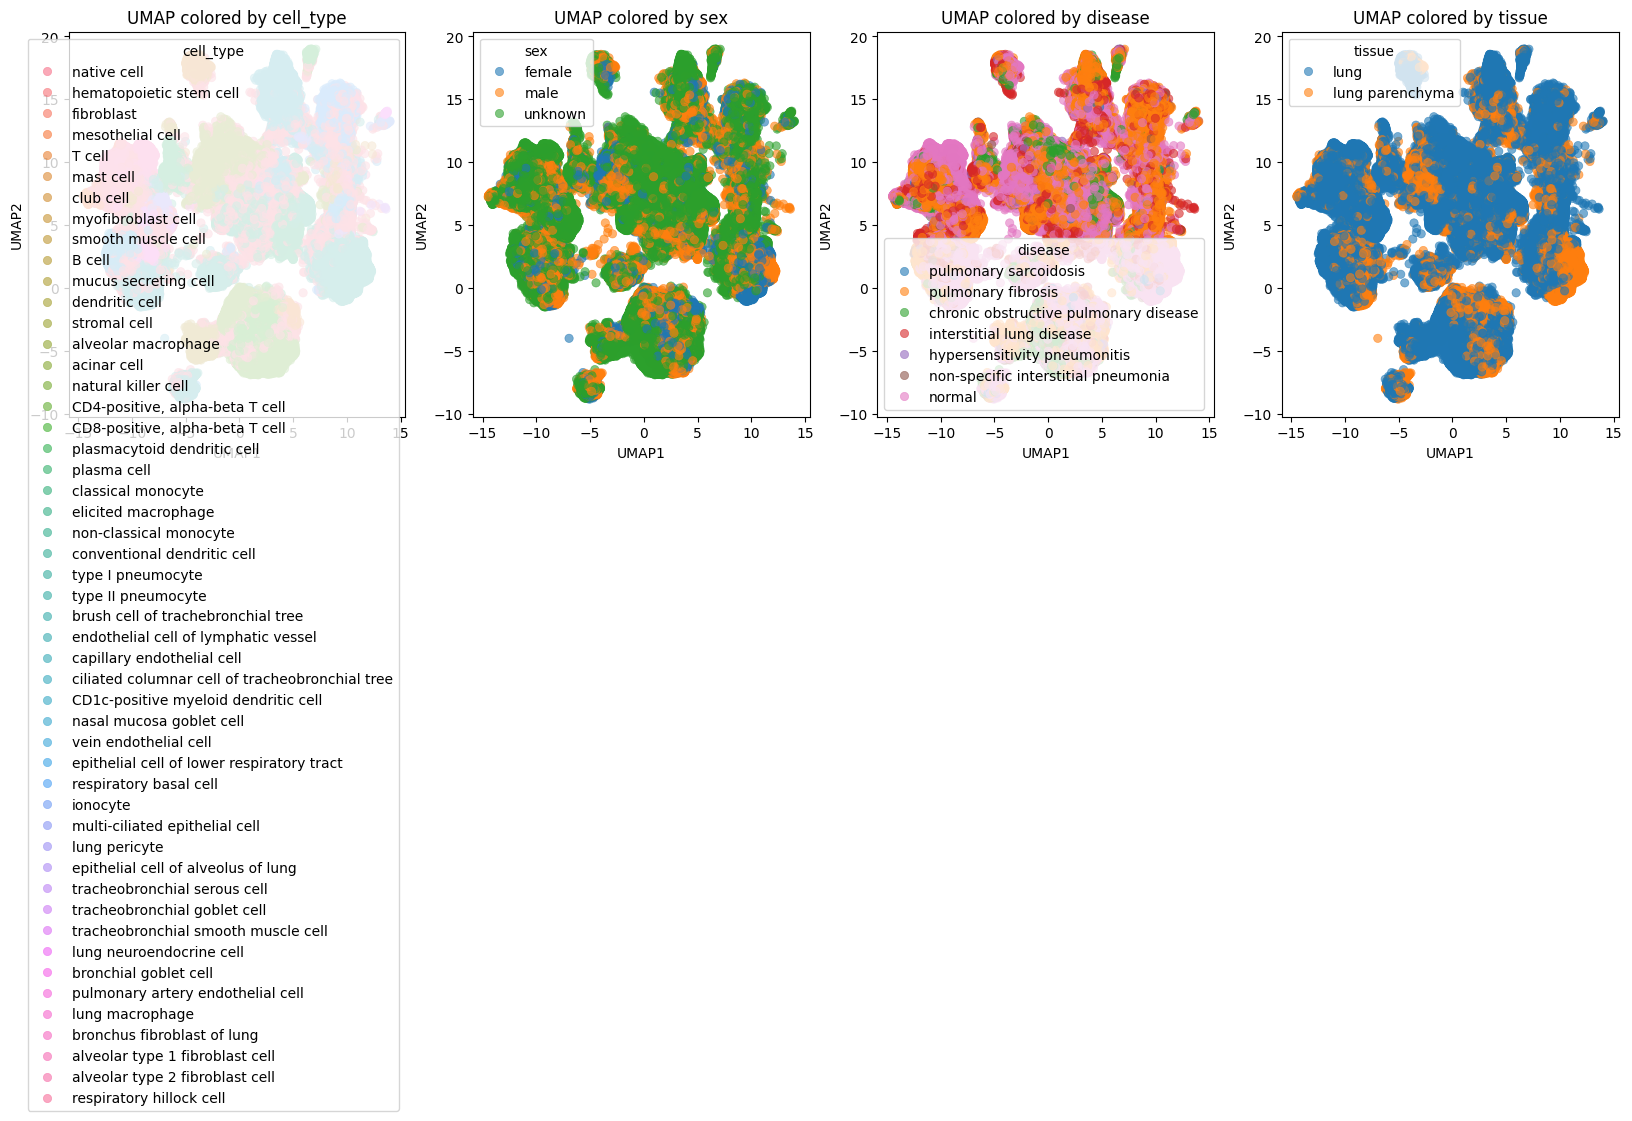

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

umap_df = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"])
metadata_columns = ["cell_type", "sex", "disease", "tissue"]
fig, axes = plt.subplots(1, len(metadata_columns), figsize=(len(metadata_columns) * 5, 5))

for ax, col in zip(axes, metadata_columns):
    umap_df[col] = adata.obs[col].values  # Assign metadata
    sns.scatterplot(
        x="UMAP1", 
        y="UMAP2", 
        hue=col, 
        data=umap_df, 
        alpha=0.6, 
        edgecolor=None, 
        ax=ax
    )
    ax.set_title(f"UMAP colored by {col}")
    #ax.legend().remove()  # Remove individual legends to avoid clutter

plt.tight_layout()
plt.show()

In [7]:
adata.X[:5,:5].toarray()

array([[0.       , 0.       , 0.       , 0.6809068, 0.       ],
       [0.       , 0.       , 0.       , 1.6584647, 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 2.7450175, 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ]],
      dtype=float32)

In [6]:
print(f"Min: {adata.layers['norm'].min()}, Max: {adata.layers['norm'].max()}")


Min: 0.0, Max: 8.764862060546875


In [8]:
print(f"Min: {adata.layers['soupX'].min()}, Max: {adata.layers['soupX'].max()}")

Min: 0.0, Max: 0.0


In [37]:
adata.layers['norm'][:10,:10].toarray()

array([[0.        , 0.        , 0.        , 0.68090677, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.65846467, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.74501753, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.95256376, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.58565867, 0.        ],
       [0.        , 0.        , 0.       

In [44]:
adata_subset = ad.AnnData(
    X=adata.layers["norm"],  # Use only the normalized expression
    obs=adata.obs[["cell_type"]],  # Keep only 'cell_type' in metadata
    var=adata.var[["feature_name"]].set_index("feature_name"),  # Set 'feature_name' as index
)

In [45]:
adata_subset

AnnData object with n_obs × n_vars = 736518 × 56295
    obs: 'cell_type'

In [46]:
adata_subset.X[:5,:5].toarray()

array([[0.        , 0.        , 0.        , 0.68090677, 0.        ],
       [0.        , 0.        , 0.        , 1.65846467, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.74501753, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [49]:
adata_subset.var.index = adata_subset.var.index.astype(str)

In [50]:
adata_subset.var.index

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       'A2ML1-AS2', 'A2MP1', 'A3GALT2',
       ...
       'MDM2', 'NLGN1', 'PCK2', 'PKD1', 'PPM1M', 'RAB1B', 'STC1', 'STXBP1',
       'TEC', 'WFS1'],
      dtype='object', name='feature_name', length=56295)

In [52]:
import pandas as pd
from pyarrow import parquet as pq
import scipy.sparse as sp

transcripts_path = Path("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/ELN357546/output-XETG00134__Xenium_089__COPD410__20241024__113632/subset/transcripts.parquet")
transcripts_df = pq.read_table(transcripts_path).to_pandas()

#prefixes to filter out
prefixes = (
"NegControlProbe_",
"antisense_",
"NegControlCodeword_",
"BLANK_",
"Blank-",
"NegPrb",
"DeprecatedCodeword_",
"Intergenic_Region_",
"UnassignedCodeword_"
)

filtered_xenium_df = transcripts_df[~transcripts_df["feature_name"].str.startswith(prefixes)]
genes = filtered_xenium_df["feature_name"].unique().tolist()

common_genes = list(set(genes) & set(adata_subset.var.index))
# Genes present only in Xenium data
missing_genes = list(set(genes) - set(adata_subset.var.index))
# Subset scRNAseq anndata object to common genes (present in scRNAseq and Xenium)
adata_com = adata_subset[:, adata_subset.var.index.isin(common_genes)]
# Add genes present only in xenium data as zero matrix to anndata object
zero_matrix = sp.csr_matrix((adata_subset.n_obs, len(missing_genes)))
missing_genes_adata = ad.AnnData(
    X=zero_matrix,
    obs=adata_subset.obs.copy(),
    var=pd.DataFrame(index=missing_genes)
)
adata_all = ad.concat([adata_com, missing_genes_adata], axis=1, merge="same")


In [53]:
len(missing_genes)

8

In [54]:
len(genes)

389

In [56]:
adata_all

AnnData object with n_obs × n_vars = 736518 × 389
    obs: 'cell_type'

In [59]:
adata.isbacked

True

In [57]:
adata.filename

PosixPath('/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/scRNAseq/HLCA_subset_IPF_COPD_ILD.h5ad')

In [60]:
adata.file.close()

work with below to avoid dangling file accoring to https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html

In [61]:
with ad.read_h5ad("my_results.h5ad", backed="r") as adata:
    print(adata.shape)

(736518, 56295)

In [62]:
del adata
import gc
gc.collect()

3760

In [7]:
import tifffile as tiff
from pathlib import Path
import numpy as np

proseg = Path("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/ELN357546/output-XETG00134__Xenium_089__COPD410__20241024__113632/proseg_output")
xenium = Path("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/ELN357546/output-XETG00134__Xenium_089__COPD410__20241024__113632/subset")
bidcell = Path("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/ELN357546/output-XETG00134__Xenium_089__COPD410__20241024__113632/bidcell_output")
bidcell_mask = tiff.imread(bidcell / "bidcell_mask.tiff")
proseg_mask = tiff.imread(proseg / "segmentation_masks/segmentation_mask_mip.tiff")
xenium_mask = tiff.imread(xenium / "cell_mask_um.tif")

print(len(np.unique(xenium_mask[100:600, 2000:2500])),len(np.unique(bidcell_mask[100:600, 2000:2500])))

695 627


In [8]:
bidcell_mask.shape

(1810, 3571)

In [6]:
len(np.unique(bidcell_mask))

12181

In [20]:
import glob
bidcell_cell_gen_dir = Path("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/ELN357546/output-XETG00134__Xenium_089__COPD410__20241024__113632/bidcell_output/cell_gene_matrices/2025_02_06_13_10_04")

file_list = sorted(glob.glob(str(bidcell_cell_gen_dir / "cell_outputs_*.csv")))

df_list = [pd.read_csv(f) for f in file_list]

cg_mat = pd.concat(df_list, axis=0, ignore_index=True)

In [21]:
cg_mat

,cell_id,cell_centroid_x,cell_centroid_y,cell_size,ACE,ACE2,ACKR1,ADAM17,ADAM28,ADAMTS1,...,UBE2C,UPK1B,UPK3B,VNN1,VSIG4,VWF,WDFY4,WFS1,WNT2,WT1
0,1.0,8880.000000,261.434327,3233.217993,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,2.0,8951.021413,275.717450,5292.733564,0.0,0.0,0.0,3.0,0.0,23.0,...,0.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,3.0,9033.468338,283.047252,4052.595156,0.0,0.0,0.0,5.0,0.0,2.0,...,0.0,10.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,8756.687307,293.993808,3366.089965,0.0,0.0,0.0,3.0,0.0,7.0,...,0.0,9.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,5.0,10718.498986,314.969574,2568.858131,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,10654.0,14467.507003,7314.397759,1860.207612,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12176,10655.0,14742.969188,7312.156863,930.103806,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
12177,10656.0,2377.512054,7314.985535,5403.460208,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12178,10657.0,2937.867647,7324.044118,1417.301038,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [22]:
cg_mat["cell_centroid_x"] = cg_mat["cell_centroid_x"] * 0.2125
cg_mat["cell_centroid_y"] = cg_mat["cell_centroid_y"] * 0.2125

In [24]:
print("min_x: ", min(cg_mat["cell_centroid_x"]), "max_x: ", max(cg_mat["cell_centroid_x"]))

min_x:  10.145454545454545 max_x:  3523.0654205607475


In [23]:
cg_mat.loc[
    (cg_mat["cell_centroid_x"] >= 2000) & 
    (cg_mat["cell_centroid_x"] <= 2500) & 
    (cg_mat["cell_centroid_y"] >= 100) & 
    (cg_mat["cell_centroid_y"] <= 600), 
    :
]

,cell_id,cell_centroid_x,cell_centroid_y,cell_size,ACE,ACE2,ACKR1,ADAM17,ADAM28,ADAMTS1,...,UBE2C,UPK1B,UPK3B,VNN1,VSIG4,VWF,WDFY4,WFS1,WNT2,WT1
85,86.0,2258.743396,102.622642,5868.512111,0.0,0.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0
92,93.0,2070.932432,100.500000,3277.508651,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,98.0,2107.875000,101.038462,2303.114187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,99.0,2143.169492,100.372881,1306.574394,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99,100.0,2289.104651,101.255814,1904.498270,0.0,0.0,3.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,2205.0,2301.604167,598.864583,2125.951557,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
3732,2211.0,2368.222222,599.733333,996.539792,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3733,2212.0,2378.095745,599.212766,2081.660900,4.0,0.0,0.0,2.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
3742,2221.0,2400.823529,598.823529,752.941176,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import tifffile as tiff
mask = Path("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/ELN357546/output-XETG00134__Xenium_089__COPD410__20241024__113632/bidcell_output/model_outputs/2025_02_06_13_10_04/test_output/epoch_4_step_800_connected.tif")
img =tiff.imread(mask)

img.max()


12180

In [6]:
np.unique(cell)

array([    0,     1,     2, ..., 12178, 12179, 12180], dtype=uint32)

In [7]:
np.unique(nuc)

array([    0,     1,     2, ..., 12178, 12179, 12180], dtype=uint32)

In [75]:
cells = pd.read_csv("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/ELN357546/output-XETG00134__Xenium_089__COPD410__20241024__113632/subset/cells.csv.gz", compression="gzip")

In [76]:
cells

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,nucleus_count,segmentation_method
0,abgpibcf-1,4104.076172,1418.095703,69,0,0,0,0,0,69,27.951720,21.720157,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...
1,abhahnfh-1,4159.551270,1419.705933,73,0,0,0,0,0,73,41.408283,26.280938,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...
2,abhakhkj-1,4085.981201,1445.432251,79,0,0,0,0,0,79,26.822813,22.036251,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...
3,abhapgfp-1,4089.925293,1435.122314,124,0,0,0,0,0,124,54.006877,30.661095,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...
4,abhbiibb-1,4086.219482,1426.725098,201,0,0,0,0,0,201,55.948596,31.067501,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14390,ofkfhpif-1,4368.398438,823.036133,20,0,0,0,0,0,20,184.237507,24.248907,1,Segmented by nucleus expansion of 5.0µm
14391,ofkgbagk-1,4374.480957,836.775818,85,0,0,0,0,0,85,201.893601,31.609376,1,Segmented by nucleus expansion of 5.0µm
14392,ofkhdkbh-1,4377.027344,809.896484,8,0,0,0,0,0,8,176.109381,24.835938,1,Segmented by nucleus expansion of 5.0µm
14393,ofkieldm-1,4427.429199,768.867676,75,0,0,0,0,0,75,243.121259,45.652970,1,Segmented by nucleus expansion of 5.0µm


In [86]:
features = pd.read_csv("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/ELN357546/output-XETG00134__Xenium_089__COPD410__20241024__113632/subset/cell_feature_matrix/features.tsv.gz", sep="\t", header=None, compression="gzip")

In [87]:
features

,0,1,2
0,ENSG00000159640,ACE,Gene Expression
1,ENSG00000130234,ACE2,Gene Expression
2,ENSG00000213088,ACKR1,Gene Expression
3,ENSG00000151694,ADAM17,Gene Expression
4,ENSG00000042980,ADAM28,Gene Expression
...,...,...,...
536,UnassignedCodeword_0346,UnassignedCodeword_0346,Unassigned Codeword
537,UnassignedCodeword_0357,UnassignedCodeword_0357,Unassigned Codeword
538,DeprecatedCodeword_0105,DeprecatedCodeword_0105,Deprecated Codeword
539,DeprecatedCodeword_0174,DeprecatedCodeword_0174,Deprecated Codeword


In [98]:
barcodes = cells = pd.read_csv("/g/huber/projects/GSK_lazic/public_data/BIDCell/Xenium_BC/Replicate1/data/cell_feature_matrix/barcodes.tsv", header=None)

In [99]:
barcodes

,0
0,1
1,2
2,3
3,4
4,5
...,...
167775,167776
167776,167777
167777,167778
167778,167779


In [65]:
cells.loc[:5,"cell_id"]

0    aaaahdpo-1
1    aaabmnnb-1
2    aaabokfm-1
3    aaadohdd-1
4    aaadpbjf-1
5    aaadpcna-1
Name: cell_id, dtype: object

In [68]:
barcodes[0]

0         aaaahdpo-1
1         aaabmnnb-1
2         aaabokfm-1
3         aaadohdd-1
4         aaadpbjf-1
             ...    
114180    oioekofi-1
114181    oioelbko-1
114182    oioflcgn-1
114183    oiofnhcj-1
114184    oiogcjcd-1
Name: 0, Length: 114185, dtype: object

In [71]:
barcodes[barcodes.iloc[:,0].isin(cells.loc[:5,"cell_id"])]

,0
0,aaaahdpo-1
1,aaabmnnb-1
2,aaabokfm-1
3,aaadohdd-1
4,aaadpbjf-1
5,aaadpcna-1


In [95]:
import gzip
from scipy.io import mmread

# Read the matrix
with gzip.open("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/ELN357546/output-XETG00134__Xenium_089__COPD410__20241024__113632/subset/cell_feature_matrix/matrix.mtx.gz", "rt") as f:
    sparse_matrix = mmread(f)

# Convert to dense matrix (if needed)
dense_matrix = sparse_matrix.toarray()

print(sparse_matrix.shape)  # Check dimensions


(541, 14395)


In [96]:
sparse_matrix.toarray().shape

(541, 14395)

In [1]:
from pathlib import Path
RNAseq_dir = Path("/g/huber/projects/GSK_lazic/GSK_data_confidential/lung_copd/scRNAseq")

In [2]:
import pandas as pd

sc_neg = pd.read_csv(RNAseq_dir / "sc_neg_markers.csv")
sc_neg_segger = pd.read_csv(RNAseq_dir / "sc_neg_markers_segger.csv")
sc_pos = pd.read_csv(RNAseq_dir / "sc_pos_markers.csv")
sc_pos_segger = pd.read_csv(RNAseq_dir / "sc_pos_markers_segger.csv")
sc_mean = pd.read_csv(RNAseq_dir / "sc_copd.csv")

In [8]:
sc_mean.head

<bound method NDFrame.head of     Unnamed: 0       ACE      ACE2     ACKR1    ADAM17    ADAM28   ADAMTS1  \
0            0  0.007529  0.005295  0.002820  0.209336  0.009514  0.002113   
1            1  0.007253  0.005922  0.001957  0.466480  0.011574  0.093529   
2            2  0.016325  0.011787  0.000000  0.448571  0.072304  0.229984   
3            3  0.007033  0.001643  0.001648  0.386679  1.782519  0.001096   
4            4  0.006551  0.000854  0.000415  0.295156  0.401831  0.000000   
5            5  0.021084  0.000000  0.000000  0.461054  0.266501  0.026437   
6            6  0.013467  0.007143  0.001190  0.239001  0.045311  0.001521   
7            7  0.008314  0.000769  0.001456  0.433760  0.116663  0.009336   
8            8  0.015140  0.008768  0.000000  0.382244  1.078193  0.000000   
9            9  0.016749  0.001533  0.006660  0.477225  0.493094  0.000786   
10          10  0.040789  0.002275  0.008305  0.447030  0.011596  0.453343   
11          11  0.034171  0.006375

In [3]:
sc_pos.head()

,Unnamed: 0,ACE,ACE2,ACKR1,ADAM17,ADAM28,ADAMTS1,ADGRL4,AGER,AGR3,...,UBE2C,UPK1B,UPK3B,VNN1,VSIG4,VWF,WDFY4,WFS1,WNT2,WT1
0,ATI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,ATII,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aberrant_Basaloid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B_Plasma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = sc_pos

In [5]:
df.set_index("Unnamed: 0", inplace=True)

markers_per_celltype = {
    cell_type: df.columns[df.loc[cell_type]==1].to_list() for cell_type in df.index
}

# Display the results
for cell_type, markers in markers_per_celltype.items():
    print(f"Markers for {cell_type}: {sorted(markers)}")

Markers for ATI: ['AGER', 'BANK1', 'DUOX1', 'GKN2', 'MALL', 'OTUD7B', 'PEBP4', 'SCEL', 'SEMA3B', 'SFTPD', 'UPK3B', 'WFS1']
Markers for ATII: ['CCL20', 'DUOX1', 'GKN2', 'LAMP3', 'MALL', 'PEBP4', 'SFTPD']
Markers for Aberrant_Basaloid: ['MALL', 'OTUD7B', 'RND1', 'SOX9', 'STAT1', 'TP63']
Markers for B: ['BANK1', 'CCR7', 'CD40', 'CD70', 'CD79A', 'FCMR', 'MS4A1', 'SELL', 'STAT6', 'TNFRSF13B', 'TNFRSF13C']
Markers for B_Plasma: ['CD27', 'CD38', 'CD79A', 'IGF1', 'MARCO', 'MZB1', 'P2RX1', 'POU2AF1', 'SEC11C', 'TNFRSF13B', 'TNFRSF13C', 'TNFRSF17']
Markers for Basal: ['ITGB4', 'KRT15', 'SAA1', 'TP63', 'TRPC6']
Markers for Ciliated: ['BCAS1', 'CCDC78', 'CD38', 'CP', 'DUOX1', 'FAM184A', 'FGFBP2', 'FOXJ1', 'POU2AF1', 'SAA1']
Markers for Club: ['CP', 'KLK11', 'MALL', 'STEAP4']
Markers for DC_Langerhans: ['CCL17', 'CD1A', 'CD1C', 'CD80', 'CLEC10A', 'FCER1A', 'FCGR2B', 'HPGDS', 'IL18', 'S100B']
Markers for DC_Mature: ['CCL17', 'CCL19', 'CCL22', 'CCR7', 'CD40', 'CD80', 'CRLF2', 'FSCN1', 'LAMP3', 'SLC7A

In [8]:
df = sc_pos_segger

In [9]:
df.set_index("Unnamed: 0", inplace=True)

markers_per_celltype = {
    cell_type: df.columns[df.loc[cell_type]==1].to_list() for cell_type in df.index
}

# Display the results
for cell_type, markers in markers_per_celltype.items():
    print(f"Markers for {cell_type}: {markers}")

Markers for Macrophage_Alveolar: ['ADAM17', 'AIF1', 'ANPEP', 'CSTA', 'CTSC', 'CTSL', 'CXCL3', 'FCGR3A', 'GLIPR2', 'HAVCR2', 'IL1RAP', 'LGALS3BP', 'MARCO', 'MCEMP1', 'MIS18BP1', 'MS4A4A', 'NCEH1', 'RETN', 'SEMA3C', 'SLC1A3', 'SYK', 'VSIG4']
Markers for Macrophage: ['ADAM17', 'AIF1', 'ANPEP', 'CD14', 'CD86', 'CTSC', 'CTSL', 'CXCL2', 'CXCL3', 'CXCL8', 'GLIPR2', 'GPR183', 'MARCO', 'VSIG4']
Markers for NK: ['CD247', 'FGFBP2', 'GZMA', 'GZMB', 'KLRB1', 'KLRD1', 'NKG7', 'RUNX3', 'STAT4']
Markers for T_Cytotoxic: ['CD247', 'CD3D', 'KLRD1', 'NKG7', 'RUNX3', 'STAT4']
Markers for Fibroblast: ['APOD', 'COL5A2', 'CTSL', 'DCLK1', 'EGFR', 'ENAH', 'FBN1', 'LGALS3BP', 'MFAP5', 'MYC', 'NFKBIZ', 'NID1', 'PLA2G2A', 'RARRES1', 'SEMA3C', 'SERPINA3', 'SFRP2', 'SLIT3', 'SVEP1']
Markers for cMonocyte: ['AIF1', 'CD14', 'CD300E', 'CSF3R', 'CSTA', 'FCN1', 'S100A12']
Markers for Ciliated: ['AGR3', 'ATP1B1', 'CCDC78', 'CD24', 'CDH1', 'ELF3', 'ENAH', 'EPCAM', 'FOXJ1', 'MTUS1', 'SEMA3C', 'TACSTD2', 'TMC5']
Markers for

In [6]:
df = sc_neg

In [7]:
df.set_index("Unnamed: 0", inplace=True)

markers_per_celltype = {
    cell_type: df.columns[df.loc[cell_type]==1].to_list() for cell_type in df.index
}

# Display the results
for cell_type, markers in markers_per_celltype.items():
    print(f"Markers for {cell_type}: {sorted(markers)}")

Markers for ATI: ['ASCL2', 'CD1C', 'CD28', 'CD40LG', 'CLC', 'FCGR3B', 'IGF1', 'KCNK3', 'KLRC1', 'MUC5B', 'PDCD1', 'PDGFRB', 'PLN', 'POSTN', 'PROX1', 'SELP', 'STC1']
Markers for ATII: ['CTLA4', 'CXCL11', 'PDCD1']
Markers for Aberrant_Basaloid: ['ACKR1', 'AQP9', 'ASCL2', 'CA4', 'CCDC78', 'CCL13', 'CCL22', 'CCL26', 'CCR7', 'CD163', 'CD19', 'CD1C', 'CD2', 'CD28', 'CD34', 'CD3D', 'CD3E', 'CD4', 'CD40LG', 'CD86', 'CD8A', 'CD8B', 'CDK1', 'CENPF', 'CLC', 'CLEC10A', 'CLEC12A', 'CLEC4E', 'CTLA4', 'CXCR2', 'ELANE', 'FCER1A', 'FCGR2B', 'FCGR3B', 'FCN1', 'FCN3', 'FGFR4', 'FOXP3', 'GNG11', 'GPR171', 'GPX2', 'HPGDS', 'IFNG', 'IL18RAP', 'IL33', 'IL5RA', 'KCNK3', 'LAG3', 'LTF', 'LYVE1', 'MFAP5', 'MKI67', 'MMRN1', 'MPEG1', 'MS4A1', 'MZB1', 'NTRK2', 'PAMR1', 'PDCD1', 'PDGFRB', 'PLA2G4F', 'PLA2G7', 'PLN', 'PLVAP', 'PROX1', 'PTGS1', 'RAMP2', 'RARRES1', 'RERGL', 'RORC', 'S100B', 'S1PR5', 'SELL', 'SFRP2', 'TMEM100', 'TNFRSF13B', 'TNFRSF13C', 'TNFRSF18', 'UPK3B', 'WDFY4', 'WNT2']
Markers for B: ['DIRAS3', 'IG

In [12]:
sc_mean.head()

,Unnamed: 0,ACE,ACE2,ACKR1,ADAM17,ADAM28,ADAMTS1,ADGRL4,AGER,AGR3,...,VNN1,VSIG4,VWF,WDFY4,WFS1,WNT2,WT1,ct_idx,cell_type,atlas
0,0,0.007529,0.005295,0.002820,0.209336,0.009514,0.002113,0.007980,2.881750,0.553116,...,0.003663,0.041736,0.024033,0.020039,0.850312,0.003522,0.003254,0,ATI,Homo sapiens
1,1,0.007253,0.005922,0.001957,0.466480,0.011574,0.093529,0.009996,0.122018,0.984952,...,0.002650,0.039307,0.020575,0.011980,0.022025,0.001608,0.002319,1,ATII,Homo sapiens
2,2,0.016325,0.011787,0.000000,0.448571,0.072304,0.229984,0.015014,0.079488,0.532071,...,0.026211,0.012872,0.025256,0.000000,0.053340,0.000000,0.009262,2,Aberrant_Basaloid,Homo sapiens
3,3,0.007033,0.001643,0.001648,0.386679,1.782519,0.001096,0.019272,0.011436,0.009864,...,0.002919,0.031620,0.022100,0.565899,0.001903,0.003466,0.004908,3,B,Homo sapiens
4,4,0.006551,0.000854,0.000415,0.295156,0.401831,0.000000,0.011167,0.011146,0.006108,...,0.001278,0.063863,0.016939,0.089811,0.032876,0.003154,0.000999,4,B_Plasma,Homo sapiens
